In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data

In [3]:
books = pd.read_csv('Books (3).csv',encoding='latin1')

C:\Users\sheetal\AppData\Local\Temp\ipykernel_18576\3889893064.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books (3).csv',encoding='latin1')


In [4]:
users = pd.read_csv('Users (2).csv',encoding='latin1',on_bad_lines='skip')

In [5]:
rating = pd.read_csv('Ratings (2).csv',encoding='latin1')

In [6]:
#top 5

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [10]:
#data shape
print('Books',books.shape)
print('Users',users.shape)
print('Ratings',rating.shape)

Books (271360, 8)
Users (278674, 3)
Ratings (1149780, 3)


In [11]:
users.describe()

,User-ID,Age
count,278674.000000,167959.000000
mean,139435.388160,34.755351
std,80499.376215,14.429790
min,1.000000,0.000000
25%,69722.250000,24.000000
50%,139433.500000,32.000000
75%,209151.750000,44.000000
max,278858.000000,244.000000


In [12]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [13]:
rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149772e+06
mean,1.403864e+05,2.866927e+00
std,8.056228e+04,3.854179e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [14]:
#checking null values for columns
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [15]:
users.isnull().sum()

User-ID          0
Location         0
Age         110715
dtype: int64

In [16]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    8
dtype: int64

In [17]:
#fill that column of rating
rating['Book-Rating'].fillna(rating['Book-Rating'].mean(),inplace=True)

In [18]:
rating['Book-Rating'] = rating['Book-Rating'].astype(int)

In [19]:
rating['User-ID'].value_counts() # here total 105283 users rates the books

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [20]:
x = rating['User-ID'].value_counts()>200

In [21]:
y = x[x].index

In [22]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [23]:
y.shape #here total 899 users give more than 200 ratings on books

(899,)

In [24]:
rating = rating[rating['User-ID'].isin(y)]

In [25]:
rating

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [26]:
#here we combine the books data to ratings data
rating_books = rating.merge(books, on='ISBN')

In [27]:
rating_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [28]:
rating_books.shape # now here user give rating w.r.t books

(487671, 10)

In [29]:
#here we calculate total rating w.r.t book
total_ratings = rating_books.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [30]:
#Rename the column 'Book-Rating' column to 'Number_of_Ratings'
total_ratings.rename(columns={'Book-Rating': 'Number_of_Ratings'},inplace=True)

In [31]:
total_ratings

,Book-Title,Number_of_Ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,ÿ¿ber die Pflicht zum Ungehorsam gegen den Staat.,3
160265,ÿ¿lpiraten.,1
160266,ÿ¿rger mit Produkt X. Roman.,1
160267,ÿ¿stlich der Berge.,1


In [32]:
total_ratings['Number_of_Ratings'].max() #max total number of ratings on book

363

In [33]:
#here we combine the number_of_ratings to the rating_books
final_ratings = rating_books.merge(total_ratings,on='Book-Title')

In [34]:
final_ratings #this shows rating by particular user and also total number of ratings on that book

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Number_of_Ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...,http://images.amazon.com/images/P/1892145022.0...,1
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,1
487668,275970,3411086211,10,Die Biene.,Sybil Grÿ¤fin Schÿ¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,1
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,1


In [35]:
final_ratings = final_ratings[final_ratings['Number_of_Ratings']>=50]

In [36]:
final_ratings.shape

(61853, 11)

In [37]:
final_ratings.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Number_of_Ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82


C:\Users\sheetal\AppData\Local\Temp\ipykernel_18576\2973850363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_ratings.corr(), annot=True)


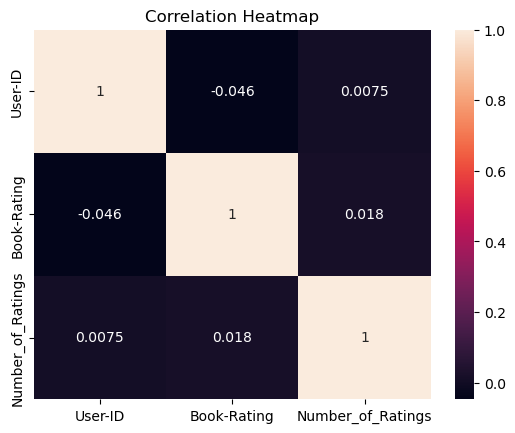

In [38]:
# Correlation heatmap
sns.heatmap(final_ratings.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


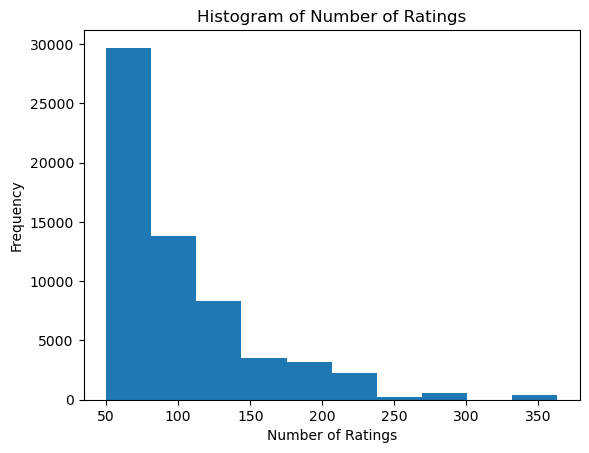

In [39]:
# Histogram for 'Number_of_Ratings'
plt.hist(final_ratings['Number_of_Ratings'], bins=10)
plt.title('Histogram of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

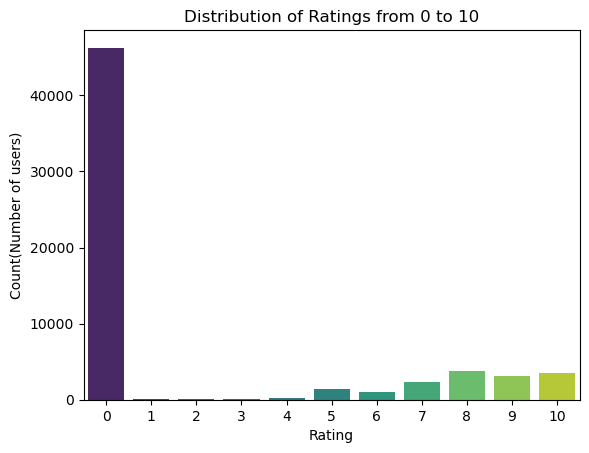

In [40]:
# Plot the distribution of ratings given by users
sns.countplot(x='Book-Rating', data=final_ratings, palette='viridis')
plt.title('Distribution of Ratings from 0 to 10')
plt.xlabel('Rating')
plt.ylabel('Count(Number of users)')
plt.show()

<Axes: >

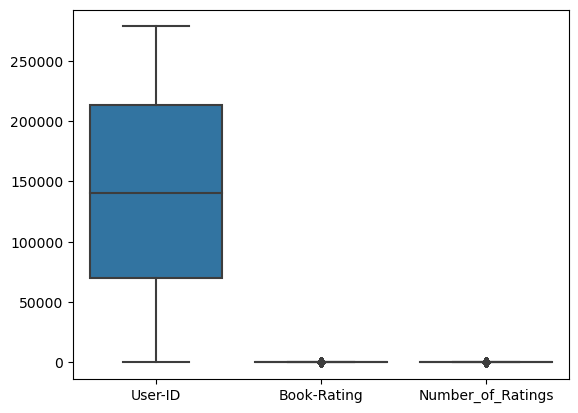

In [41]:
#boxplot 
sns.boxplot(final_ratings)

Most Active Users:
11676     989
35859     451
76352     400
16795     388
153662    369
102967    337
230522    329
185233    320
78783     317
55492     311
Name: User-ID, dtype: int64


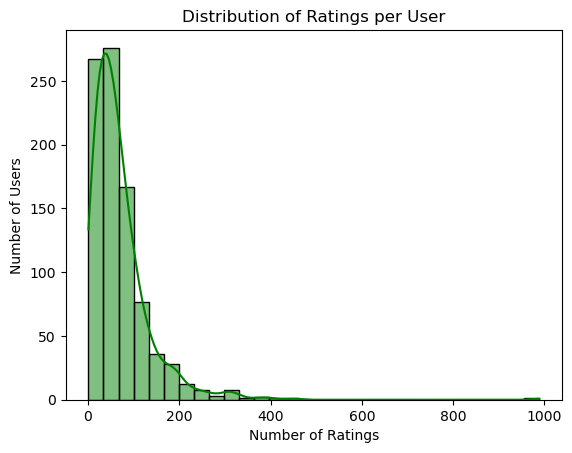

In [42]:
# Most active users - top 10
most_active_users = final_ratings['User-ID'].value_counts().head(10)
print("Most Active Users:")
print(most_active_users)

# User Rating Distribution
sns.histplot(final_ratings['User-ID'].value_counts(), bins=30, kde=True, color='green')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


In [43]:
# Top Authors by Number of Books
top_authors = final_ratings['Book-Author'].value_counts().head(10)

# Top Publishers by Number of Books
top_publishers = final_ratings['Publisher'].value_counts().head(10)

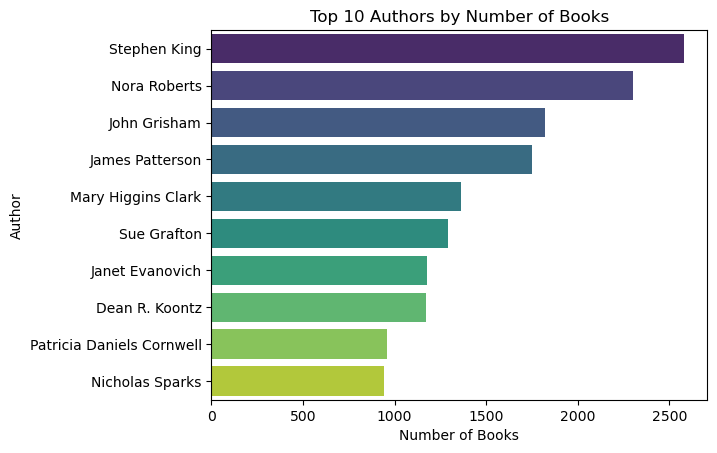

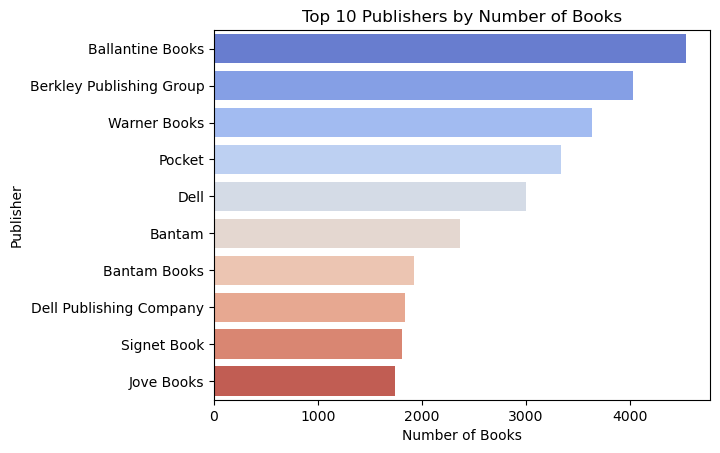

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Authors by Number of Books
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# Top Publishers by Number of Books
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()


C:\Users\sheetal\AppData\Local\Temp\ipykernel_18576\2882338050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ratings['Year-Of-Publication'] = pd.to_numeric(final_ratings['Year-Of-Publication'], errors='coerce')


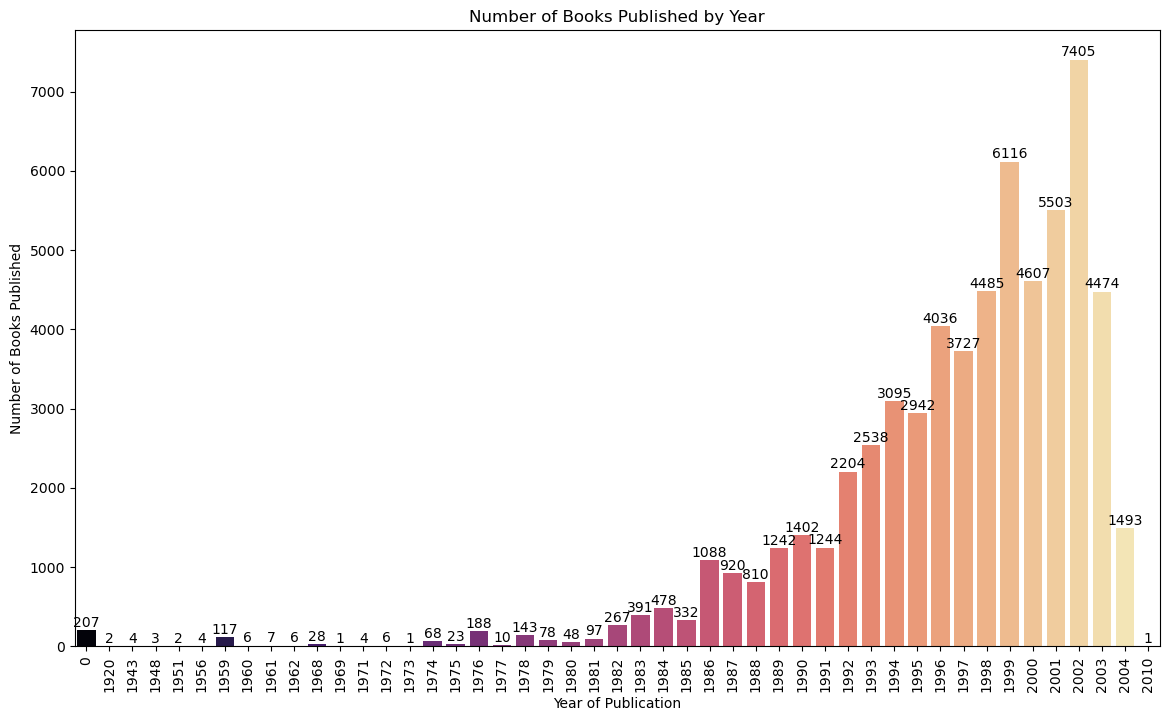

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year-Of-Publication' to numeric, coercing errors to NaN
final_ratings['Year-Of-Publication'] = pd.to_numeric(final_ratings['Year-Of-Publication'], errors='coerce')

# Drop rows with NaN values in 'Year-Of-Publication' after conversion
final_ratings = final_ratings.dropna(subset=['Year-Of-Publication'])

# Convert the 'Year-Of-Publication' to integer
final_ratings['Year-Of-Publication'] = final_ratings['Year-Of-Publication'].astype(int)

# Count the number of books published each year
books_per_year = final_ratings['Year-Of-Publication'].value_counts().sort_index()

# Plotting the distribution of books by year of publication
plt.figure(figsize=(14, 8))
sns.barplot(x=books_per_year.index, y=books_per_year.values, palette='magma')

# Annotate each bar with the count
for index, value in enumerate(books_per_year.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books Published')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()


In [46]:
final_ratings.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Number_of_Ratings      0
dtype: int64

In [47]:
#method-1

In [48]:
book_pivot = final_ratings.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')

In [49]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [50]:
book_pivot.shape

(742, 888)

In [51]:
book_pivot.fillna(0,inplace=True)

In [52]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#for large or sparse data use cosine similarity

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
similarity_scores = cosine_similarity(book_pivot)

In [56]:
similarity_scores

array([[1.        , 0.09259251, 0.01122267, ..., 0.11132415, 0.06754227,
        0.03967511],
       [0.09259251, 1.        , 0.23225215, ..., 0.07313708, 0.16475569,
        0.14009737],
       [0.01122267, 0.23225215, 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.11132415, 0.07313708, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.06754227, 0.16475569, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.03967511, 0.14009737, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [57]:
similarity_scores.shape

(742, 742)

In [58]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = final_ratings[final_ratings['Book-Title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Rating')['Book-Rating'].values)) 
        item.extend(list(temp_df.drop_duplicates('Year-Of-Publication')['Year-Of-Publication'].values))

        
        data.append(item)
    
    return data

In [61]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136369.01.MZZZZZZZ.jpg',
  0,
  9,
  10,
  8,
  7,
  5,
  6,
  2001,
  1999,
  2000],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg',
  9,
  10,
  0,
  8,
  7,
  3,
  5,
  6,
  2000,
  2002],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg',
  0,
  8,
  10,
  9,
  7,
  5,
  6,
  1999],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043936213X.01.MZZZZZZZ.jpg',
  0,
  9,
  10,
  8,
  5,
  7,
  2001,
  1998],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg',
  0,
  9,
  10,
  8,
  7,
  5,
  4,
  2003,
  2004]]

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Recommend function based on cosine similarity
def recommend(book_name):
    try:
        # index fetch
        index = np.where(book_pivot.index == book_name)[0][0]
        similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

        data = []
        for i in similar_items:
            item = []
            temp_df = final_ratings[final_ratings['Book-Title'] == book_pivot.index[i[0]]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Author')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Image-URL-M')['Image-URL-M'].values))
            
            data.append(item)

        return data
    except IndexError:
        return []  # If the book is not found, return an empty list

# Evaluation for a single book recommendation
def evaluate_recommendation(book_name):
    # Recommendations based on the provided book name
    recommendations = recommend(book_name)

    # Assuming the first recommendation as the predicted value
    predicted = recommendations[0][0] if recommendations else None

    # Ground truth: Assuming the original book itself should be in the recommendations
    ground_truth = book_name

    # Evaluation
    y_true = [ground_truth]  # Ground truth value
    y_pred = [predicted] if predicted else []  # Predicted value

    # Calculate precision, recall, F1 score, and accuracy
    precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=1)
    accuracy = accuracy_score(y_true, y_pred)

    print(f'Recommendations: {recommendations}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Accuracy: {accuracy:.2f}')

# Example usage
book_name = 'Harry Potter and the Chamber of Secrets (Book 2)'
evaluate_recommendation(book_name)


Recommendations: [['Harry Potter and the Prisoner of Azkaban (Book 3)', 'J. K. Rowling', 'http://images.amazon.com/images/P/0439136369.01.MZZZZZZZ.jpg', 'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg', 'http://images.amazon.com/images/P/0786222743.01.MZZZZZZZ.jpg'], ['Harry Potter and the Goblet of Fire (Book 4)', 'J. K. Rowling', 'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg', 'http://images.amazon.com/images/P/0439139600.01.MZZZZZZZ.jpg'], ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", 'J. K. Rowling', 'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'], ["Harry Potter and the Sorcerer's Stone (Book 1)", 'J. K. Rowling', 'http://images.amazon.com/images/P/043936213X.01.MZZZZZZZ.jpg', 'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'], ['Harry Potter and the Order of the Phoenix (Book 5)', 'J. K. Rowling', 'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg', 'http://images.amazon.com/images/P/0439